<a href="https://colab.research.google.com/github/prabhat7777/SuperviseML_Retail_Sales_Prediciton/blob/main/Team_notebook_of_Rossmann_Sales_Prediction_Capstone_Project(Prabhat_Annayan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##**Importing libraries and Accessing data**

###**Importing Libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###**Accessing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df_store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Retail_sales_prediction/Data/store.csv')
df_Rossmann = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Retail_sales_prediction/Data/Rossmann Stores Data.csv')

In [ ]:
df_store.shape

(1115, 10)

In [ ]:
#let's ecplore the different column and their datatypes in store dataframe
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


We can see some null value in Promo2SinceWeek, Promo2SinceYear and PromoInterval columns. 

In [ ]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df_Rossmann.shape

(1017209, 9)

In [ ]:
#let's explore the different column and their datatypes in sales dataframe
df_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


##**Handling missing data**

In [ ]:
#let's check total null value in our dataset for each column
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:

*   **CompetitionDistance**- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

*   **CompetitionOpenSinceMonth**- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

*   **CompetitionOpenSinceYear**- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month.
*    **Promo2SinceWeek, Promo2SinceYear and PromoInterval** are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.


Text(0.5, 0, 'Competition Distance Distribution Plot')

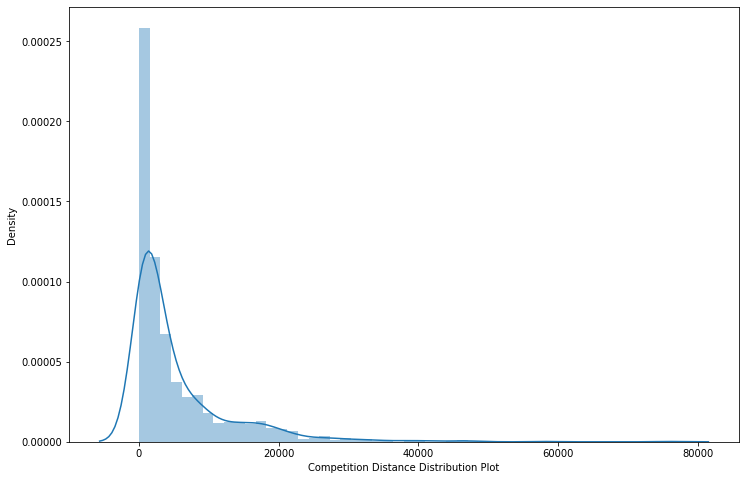

In [ ]:
#distribution plot of competition distance
plt.rcParams["figure.figsize"] = (12,8)
sns.distplot(x=df_store['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [ ]:
#filling CompetitionDistance null with meadian
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace= True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
df_store['CompetitionOpenSinceMonth'].fillna(df_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(df_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# imputing the nan values of promo2 related columns with 0
df_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store['Promo2SinceYear'].fillna(value=0,inplace=True)
df_store['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#let's check total null value in our dataset for each column
df_Rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
#checking null value again in store dataframe
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

No Nulls in Sales dataset

**Let's Merge the two dataset**

In [ ]:
df = df_Rossmann.merge( right=df_store, on='Store', how='left')

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df.shape

(1017209, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
#changing the dtype for date column so that we can extract the date, year and month
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

##**Exploratory Data Analysis**


In [ ]:
#check the unique value for each column
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

###**Categorical columns**

In [ ]:
#collecting all categorical column
catogerical_col = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
for value in catogerical_col:
  print(f'Unique values for {value}: {df[value].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


Changing the string value into int type for state holiday column

In [ ]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

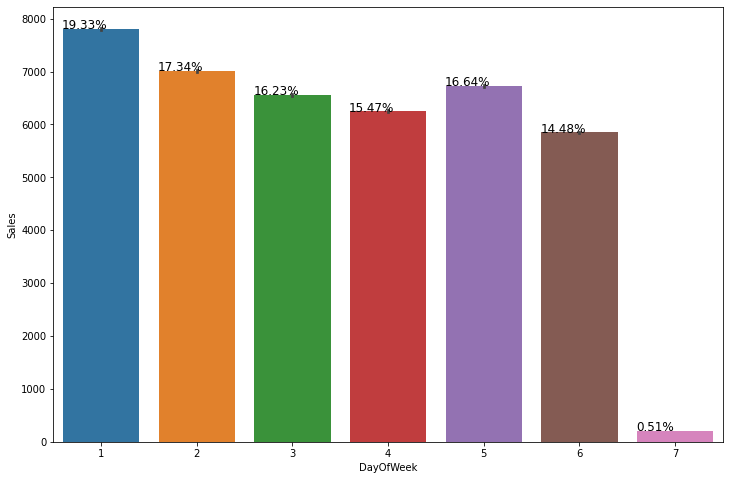

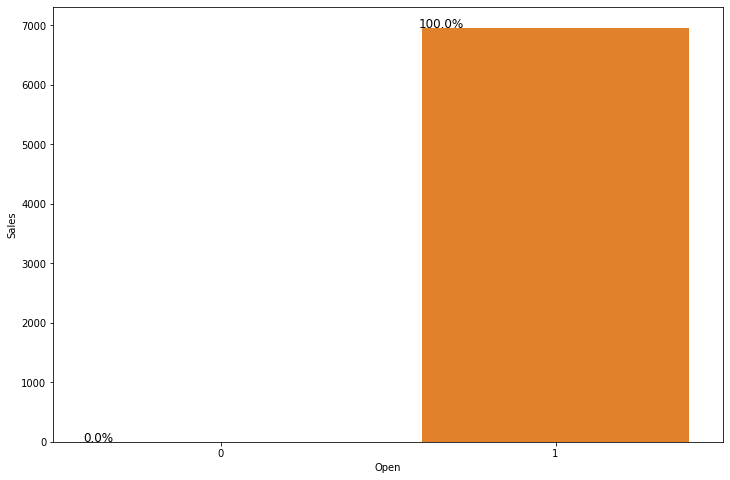

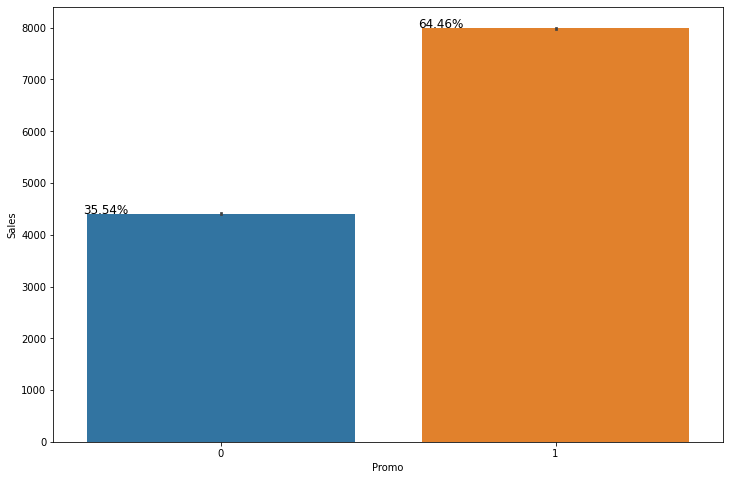

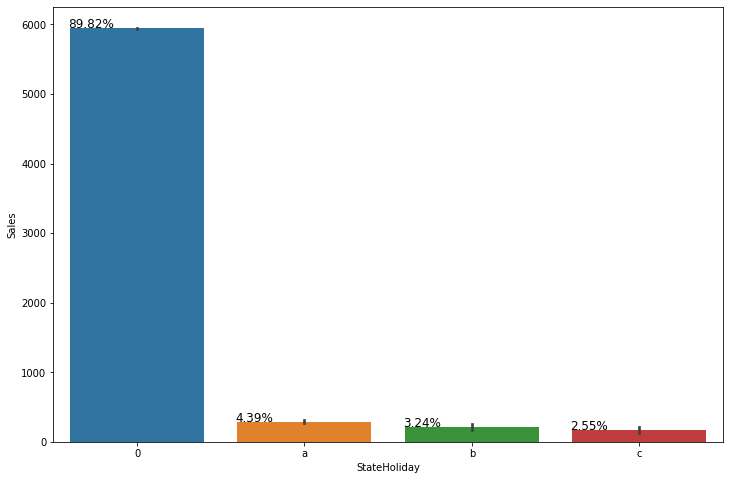

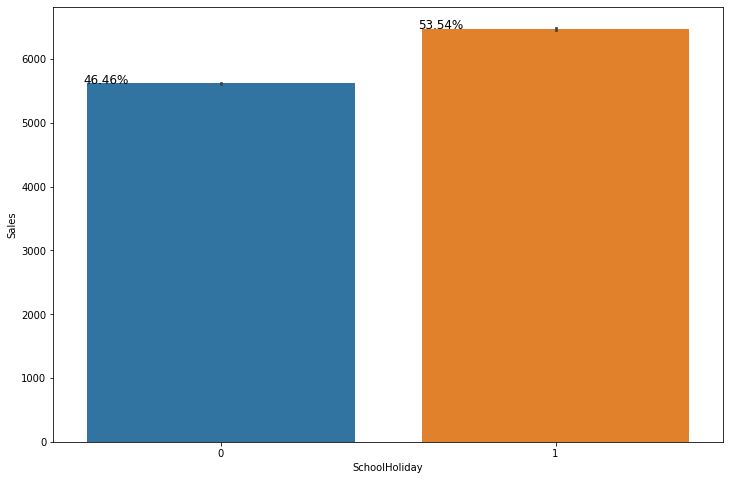

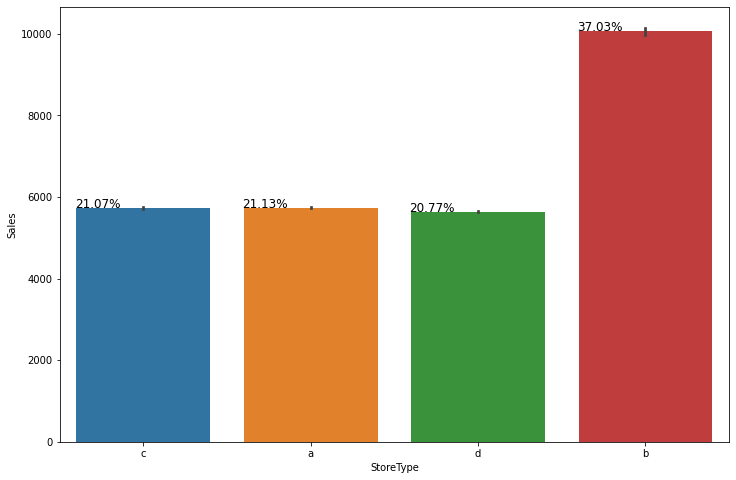

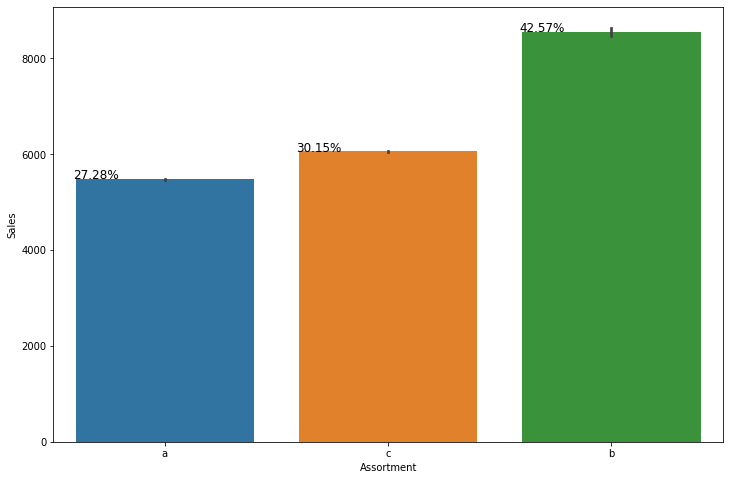

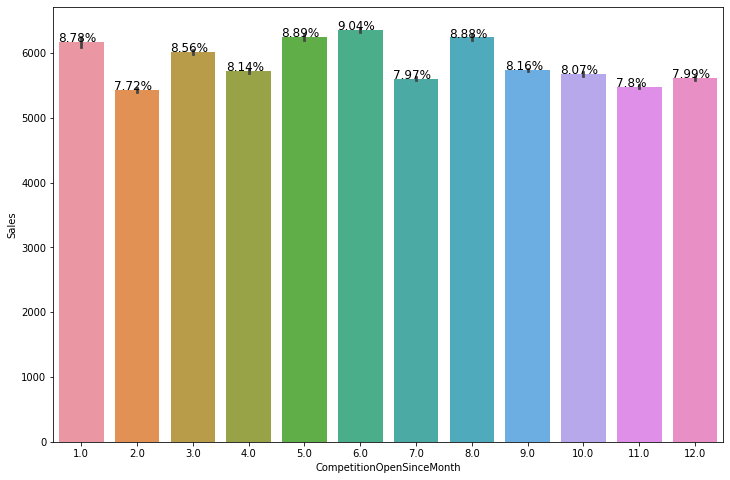

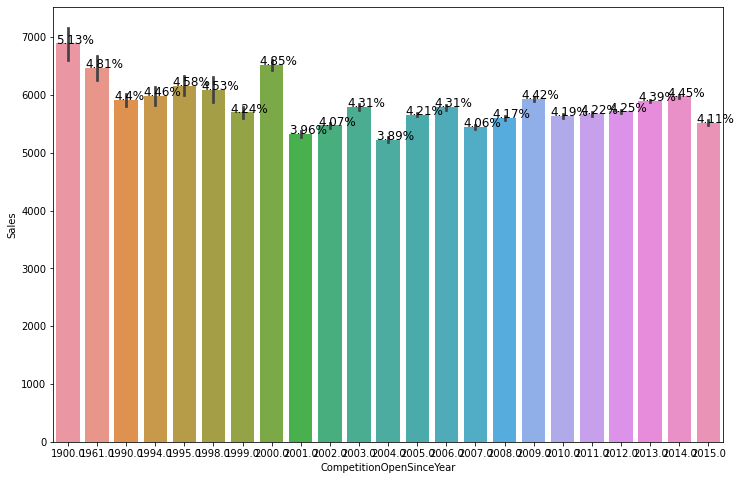

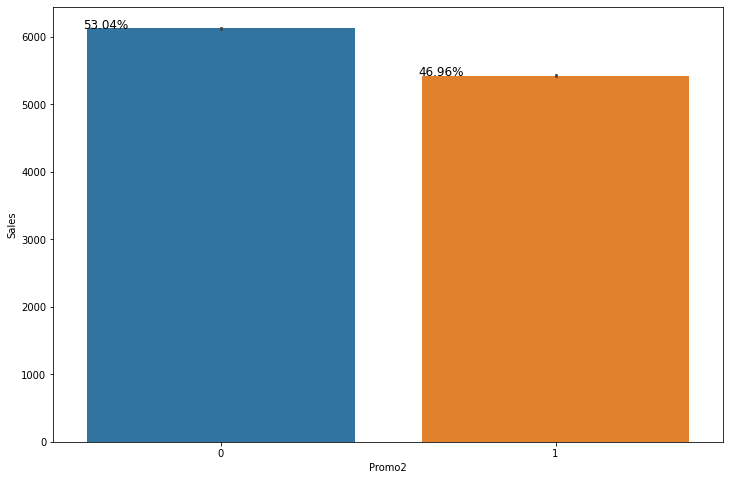

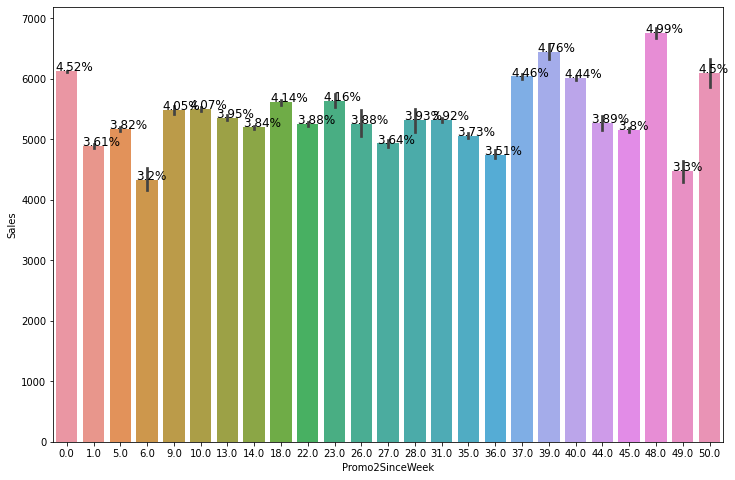

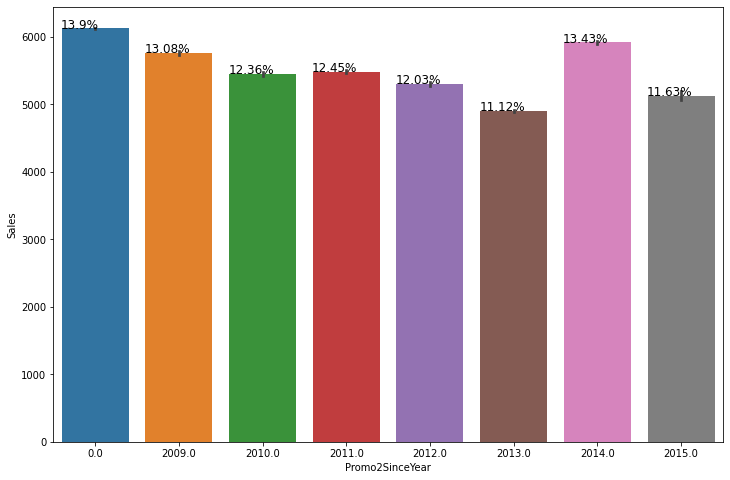

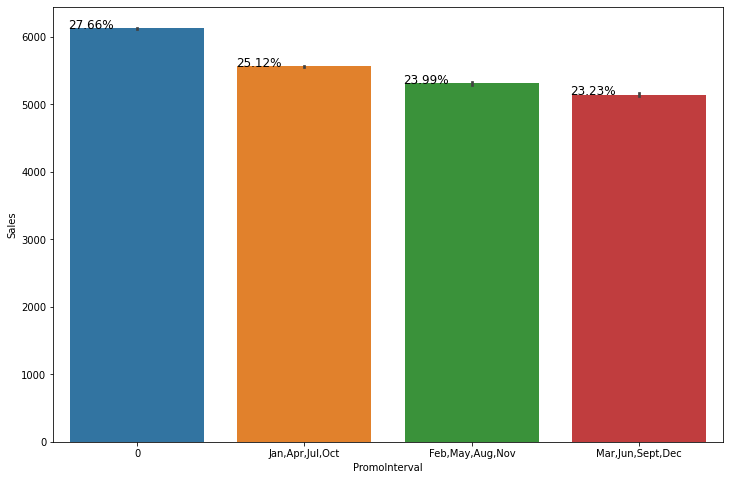

In [ ]:
#plotting bar graph for each categorical column
for value in catogerical_col:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show() 

**Observations:**


*   There were more sales on Monday comapred to other weekdays
*   Stores Opting for promo  has more sales compared to not having any promo
*   Stores were more open on schoolholidays as compared to stateHolidays 
*   StoreType b has the highest average sales as compared to other storeTypes
*   Assotment type b i.e. extra has more 42.57% sales as which is huge in difference as compared to other asortment because it has more items so customers prefer those store.
*   For Promo2 there were less sales which shows that less stores participates in Promo2
*   store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.




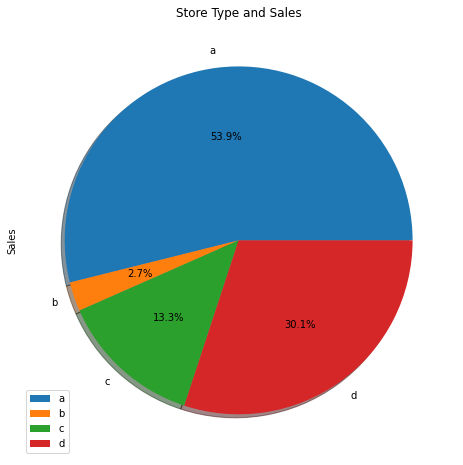

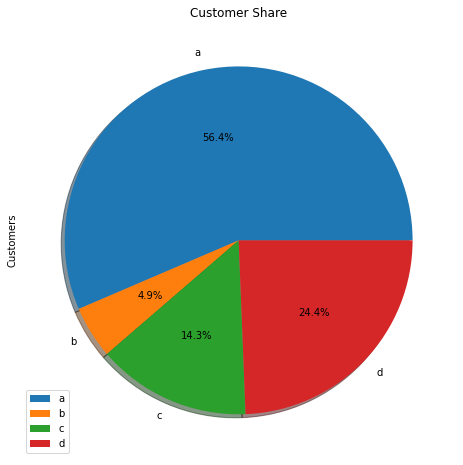

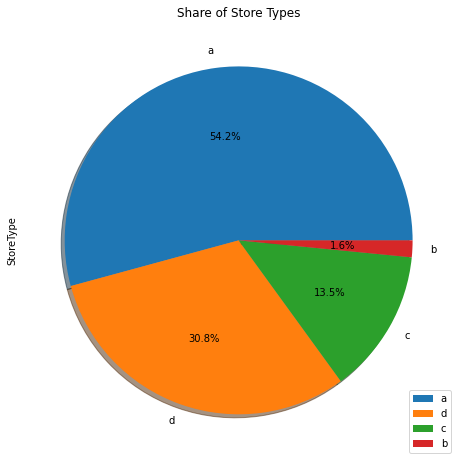

In [ ]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**Observations:**

*   Highest sales belonged to the store type a due to the high number of type a stores in our dataset as well with maximum customer share.
*   store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

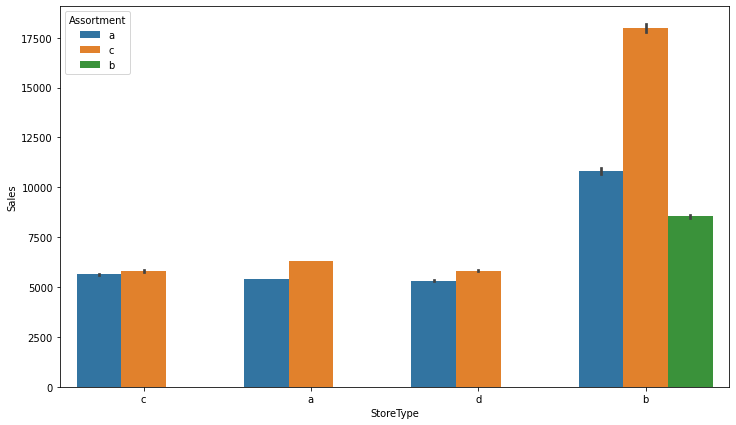

In [ ]:
#Let's check the relationship between store type, assortment levels and sales
fig = plt.figure(figsize=(12, 7))
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

**Observation:**

a,c and d StoreTypes have only a and c assortment types whereas the b storetype has all the 3 types of assortments. Hence it records the highest sales as seen earlier.

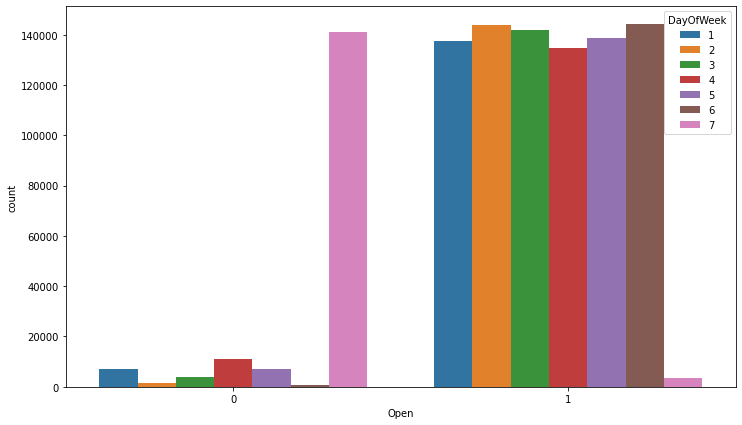

In [ ]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
fig = plt.figure(figsize=(12, 7))
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

**Observation:**

Some of the stores were closed during the weekdays as well accounting to refurbishment or holidays.

###**Extracting from date column**

In [ ]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

In [ ]:
print(years)

[2015 2014 2013]


In [ ]:
a= df.groupby(['Year', 'Open'])['Open'].count().unstack(level=-1).reset_index()

a.columns= ['Year', 'Close', 'Open']
a['Percentage'] = np.round((a['Close']/(a['Open']+a['Close']))*100,2)
a

,Year,Close,Open,Percentage
0,2013,69031,337943,16.96
1,2014,63438,310417,16.97
2,2015,40348,196032,17.07


There were more stores opened on year 2013 accounting for more sales.

In [ ]:
a= df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
a.head()

,Year,Month,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063


[Text(0.5, 1.0, 'Monthly sales ove the year')]

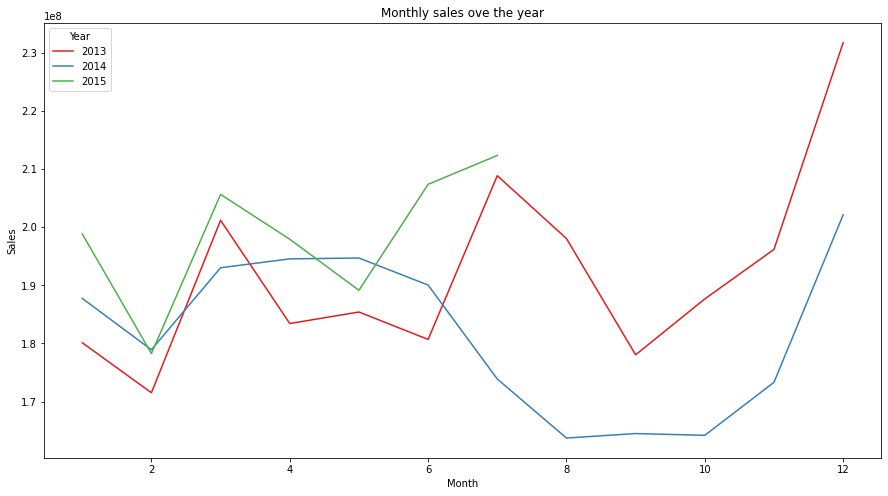

In [ ]:
plt.rcParams['figure.figsize'] = (15,8)
sns.lineplot(x='Month', y= 'Sales', ci= None , data=a, hue='Year', palette = 'Set1').set(title='Monthly sales ove the year')


As we can observe from above that Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

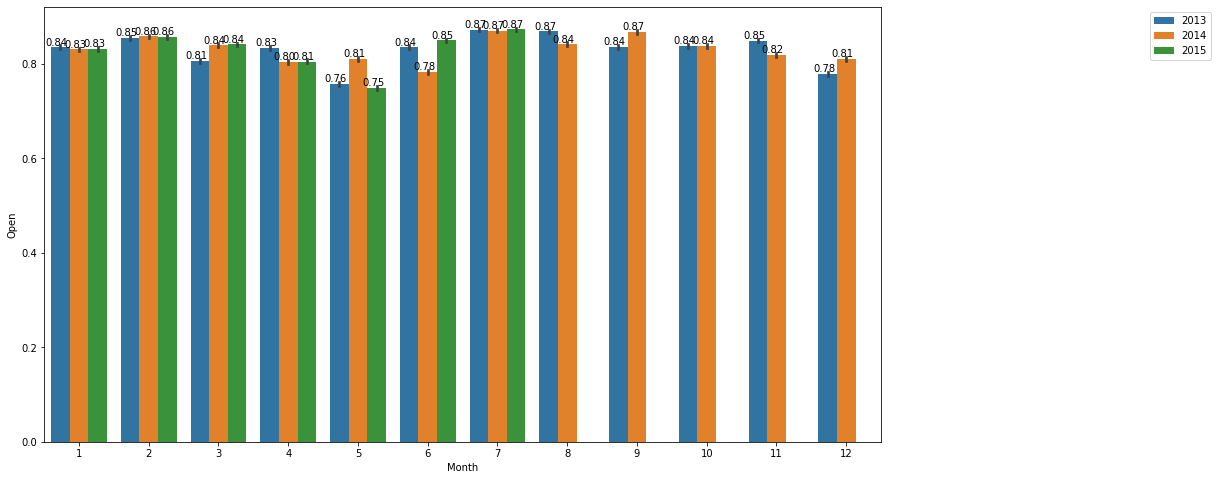

In [ ]:
#Comparing the sales over the three different years
ax= sns.barplot(x=df['Month'] , y=df['Open'], hue=df['Year'])
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
totals = []
for i in ax.patches: #for every patch in the barplot ax
  ax.annotate(format(i.get_height(),'.2f'),(i.get_x() + i.get_width()/4,i.get_height()),va='top',size=10, xytext=(-10,10),textcoords='offset points')

###**Numerical Feature analysis**

In [ ]:
#Numerical features
numerical_col= ['CompetitionDistance', 'Customers']

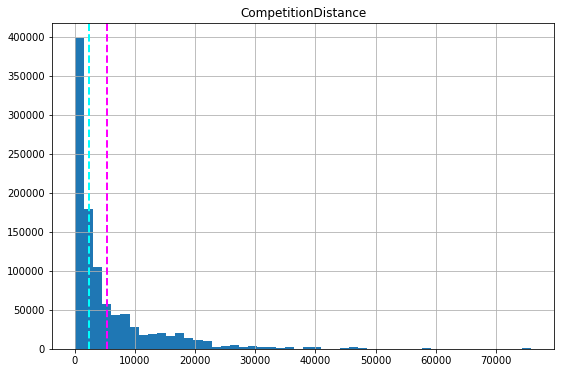

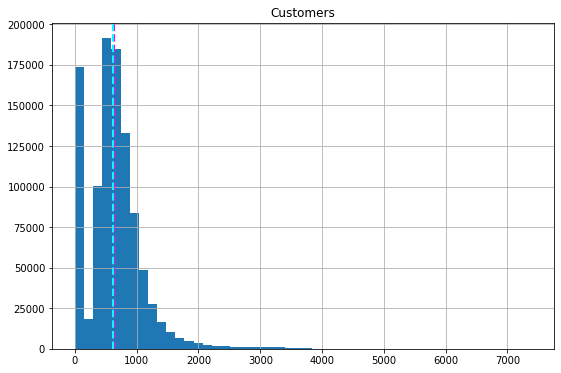

In [ ]:
for col in numerical_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Observations:
*   As we can see from the above graph that customers count for customers visiting store less than 2000 is very dense.
*   There is more competition within less then 10Km of area.

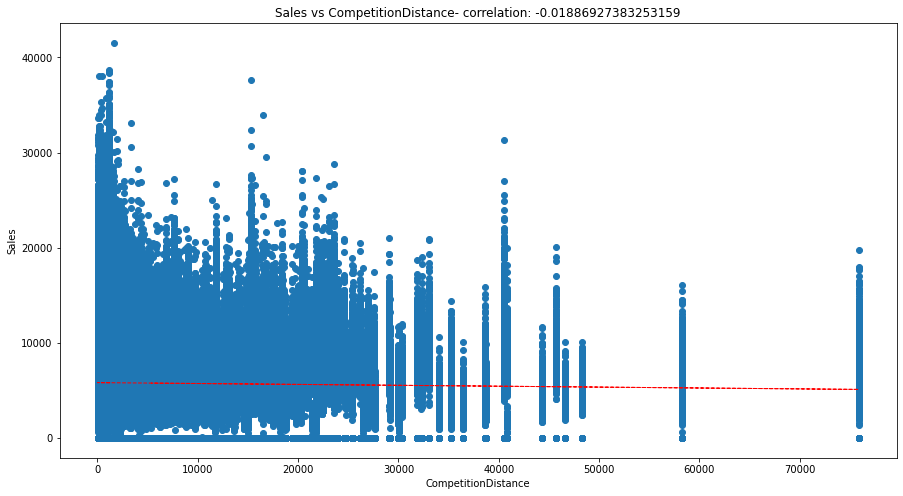

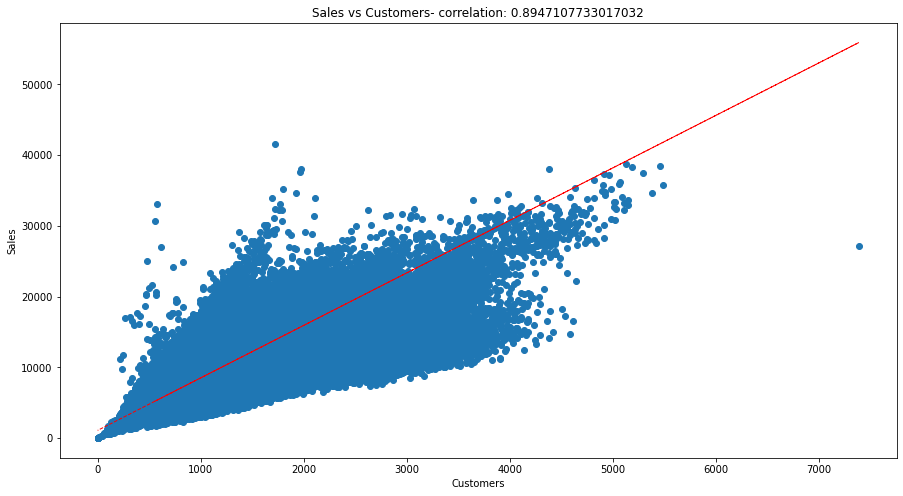

In [ ]:
for col in numerical_col:
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Observation:

*  From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

*  Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

##**Distribution plot of sales**

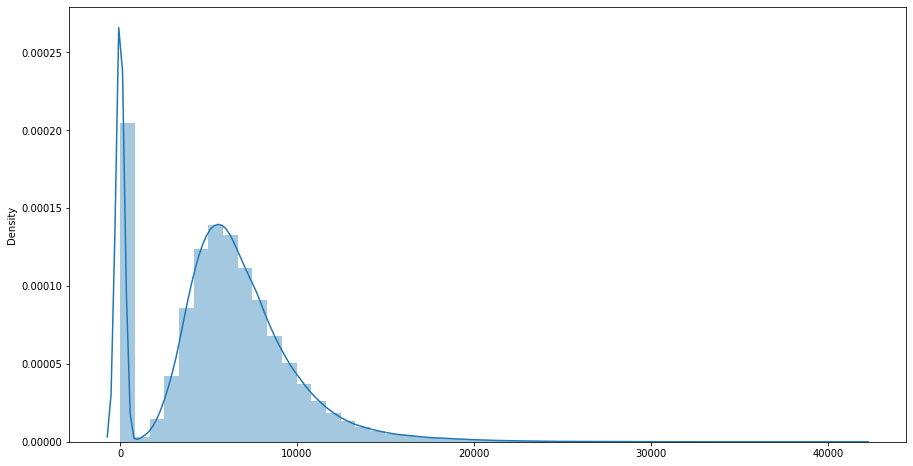

In [ ]:
#distribution plot of Sales
sns.distplot(x=df['Sales'])

As we can see from above plot at value 0 sales the curve is having peak that means there are lot of stores which were having zero sales. We need to analyze why they were zero sales and hadle it carefully.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

So the graph is positively skewed, maybe the stores were closed due to refubrishment or holiday.

In [ ]:
#let's check number of observation for closed store
df[df['Open']==0].shape

(172817, 22)

Yes so the reason for positively skewed graph is because there were around 17k stores that were closed.

In [ ]:
#we'll remove the stores which were closed as they do not account to sales
df1= df[df['Open']!=0]

In [ ]:
#checking shape of oringinal dataset
df.shape

(1017209, 22)

In [ ]:
#checking the closed store values were dropped
df1.shape

(844392, 22)

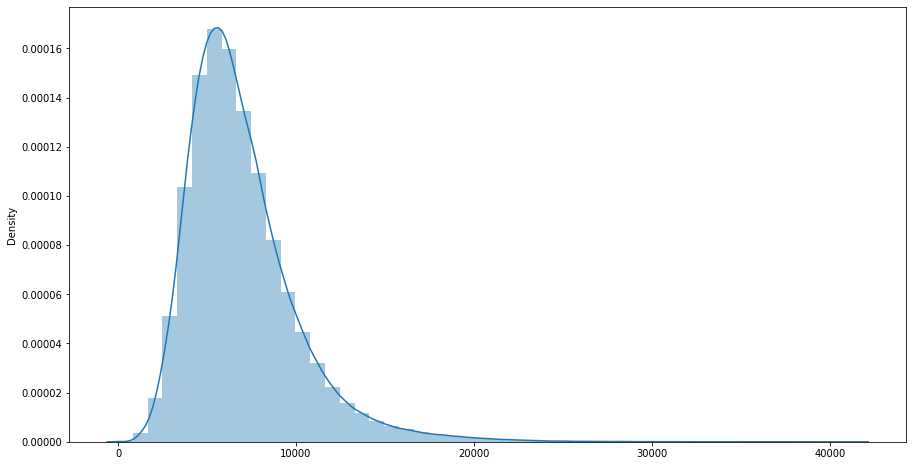

In [ ]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

The reason for peak at zero sales was because they were 17k stores which were closed. We have remove the closed store from our data as they do not accoun to any sales and now we have got the normally distributed curve with some skewness.
But the graph still have some skewness, we'll apply the log transformation to get the curve normally distributed

In [ ]:
## transformation
df1['Sales'] = np.log(df1['Sales'])

In [ ]:
#checking null values after applying transformation
df1.isnull().sum()


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
WeekOfYear                   0
DayOfYear                    0
dtype: int64

There might be situation where sales were zero although if stores were open

In [ ]:
#checking the store with zero sales
df_0 = df1[df1['Sales']<0]
df.iloc[142278]

df1.iloc[22589]

Store                                        234
DayOfWeek                                      3
Date                         2015-07-08 00:00:00
Sales                                    9.08557
Customers                                    823
Open                                           1
Promo                                          0
StateHoliday                                   0
SchoolHoliday                                  1
StoreType                                      d
Assortment                                     a
CompetitionDistance                       4370.0
CompetitionOpenSinceMonth                    9.0
CompetitionOpenSinceYear                  2013.0
Promo2                                         0
Promo2SinceWeek                              0.0
Promo2SinceYear                              0.0
PromoInterval                                  0
Year                                        2015
Month                                          7
WeekOfYear          

There are 54 stores where sales are zero although if store is open causing our value to be negative infinity after transformation, so we'll drop those values.

In [ ]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

In [ ]:
df1.shape

(844338, 22)

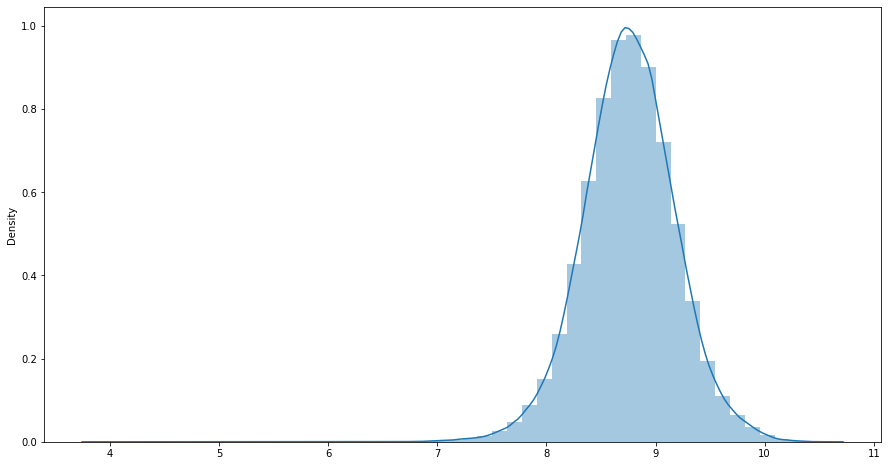

In [ ]:
#Plot for sales after transforming
sns.distplot(x=df1['Sales'])

##**Checking Outlier and Treating them**

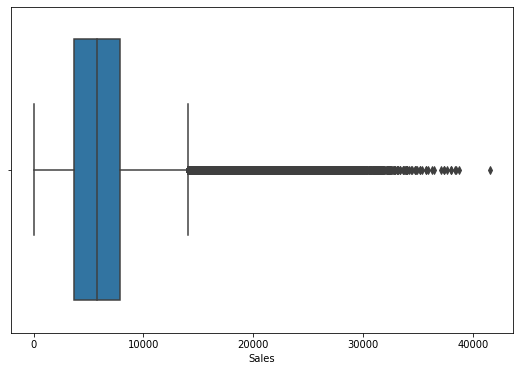

In [ ]:
#Checking Outliers in sales column
fig = plt.figure(figsize=(9, 6))
sns.boxplot(x=df["Sales"])
plt.show()

As we can see there are outliers in sales, now we'll find out why we have huge outliers

Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

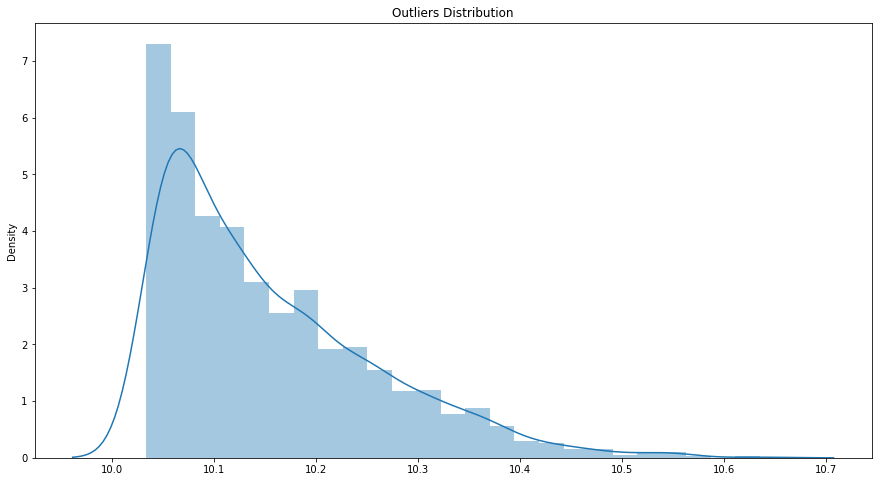

In [ ]:
#code to separate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers.

In [ ]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 10.2 are {percentage_of_outliers}')

The percentage of observations of sales greater than 10.2 are 0.050809036191667316


###**Exploring the reason behind outliers**

In [ ]:
#exploring the reason behind the sales greater then 10.2
print(sales_outliers.shape)
sales_outliers[(sales_outliers['Promo']==1) & (sales_outliers['DayOfWeek']<7)]


(429, 22)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
1113,1114,5,2015-07-31,10.222232,3745,1,1,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,31,212
5301,842,1,2015-07-27,10.235701,1493,1,1,0,0,d,...,11.0,2007.0,0,0.0,0.0,0,2015,7,31,208
20886,817,1,2015-07-13,10.210163,3437,1,1,0,0,a,...,3.0,2006.0,0,0.0,0.0,0,2015,7,29,194
21183,1114,1,2015-07-13,10.245516,3592,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,29,194
34563,1114,3,2015-07-01,10.206218,3788,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2015,7,27,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979001,817,1,2013-02-04,10.362462,4067,1,1,0,1,a,...,3.0,2006.0,0,0.0,0.0,0,2013,2,6,35
993496,817,2,2013-01-22,10.210605,7388,1,1,0,0,a,...,3.0,2006.0,0,0.0,0.0,0,2013,1,4,22
994611,817,1,2013-01-21,10.330942,3900,1,1,0,0,a,...,3.0,2006.0,0,0.0,0.0,0,2013,1,4,21
1009106,817,2,2013-01-08,10.241744,3862,1,1,0,0,a,...,3.0,2006.0,0,0.0,0.0,0,2013,1,2,8


As we can observed because these stores are participating in promo and hence havingh high sales. So these are valid outliers.

In [ ]:
sales_outliers[(sales_outliers['Promo']==0) & (sales_outliers['DayOfWeek']==7)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5836,262,7,2015-07-26,10.390440,4783,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
13641,262,7,2015-07-19,10.362967,4691,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,29,200
21446,262,7,2015-07-12,10.381924,4623,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,28,193
29251,262,7,2015-07-05,10.317417,4762,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,27,186
37056,262,7,2015-06-28,10.268721,4450,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,6,26,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932731,262,7,2013-03-17,10.247822,4204,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2013,3,11,76
940536,262,7,2013-03-10,10.207068,4130,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2013,3,10,69
948341,262,7,2013-03-03,10.280210,4314,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2013,3,9,62
971756,262,7,2013-02-10,10.209280,4133,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2013,2,6,41


As we can see from above these stores are opened durng sunday as well and during sunday less stores are opened which is possible reason for high sales.

In [ ]:
sales_outliers[(sales_outliers['Promo']==0) & (sales_outliers['DayOfWeek']<7)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
28750,876,1,2015-07-06,10.215740,1653,1,0,0,0,a,...,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",2015,7,28,187
43278,909,2,2015-06-23,10.310219,1635,1,0,0,0,a,...,9.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,6,26,174
44393,909,1,2015-06-22,10.634677,1721,1,0,0,0,a,...,9.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,6,26,173
74966,262,1,2015-05-25,10.467636,4989,1,0,a,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,5,22,145
86696,842,5,2015-05-15,10.297791,1632,1,0,0,0,d,...,11.0,2007.0,0,0.0,0.0,0,2015,5,20,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916006,262,1,2013-04-01,10.414093,5013,1,0,b,0,b,...,5.0,2013.0,0,0.0,0.0,0,2013,4,14,91
918497,523,6,2013-03-30,10.234552,2901,1,0,0,0,c,...,11.0,2013.0,0,0.0,0.0,0,2013,3,13,89
919088,1114,6,2013-03-30,10.245835,3944,1,0,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,3,13,89
965364,560,6,2013-02-16,10.356091,3096,1,0,0,0,c,...,7.0,2013.0,0,0.0,0.0,0,2013,2,7,47


Above store are not running any promo and neither they have their stores opened on sunday but still having high sales because they have very large number of customers visiting the stores.

**Obervations:**
*   The store participating in promo had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
*   Some stores were opened on Sunday as well and those are of store type b indicating the reason behind high sales.

##**Feature Engineering**

**Correlation Matrix**

Correlation is a statistical technique that shows how two variables are related. Pandas dataframe.corr() method is used for creating the correlation matrix. It is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.



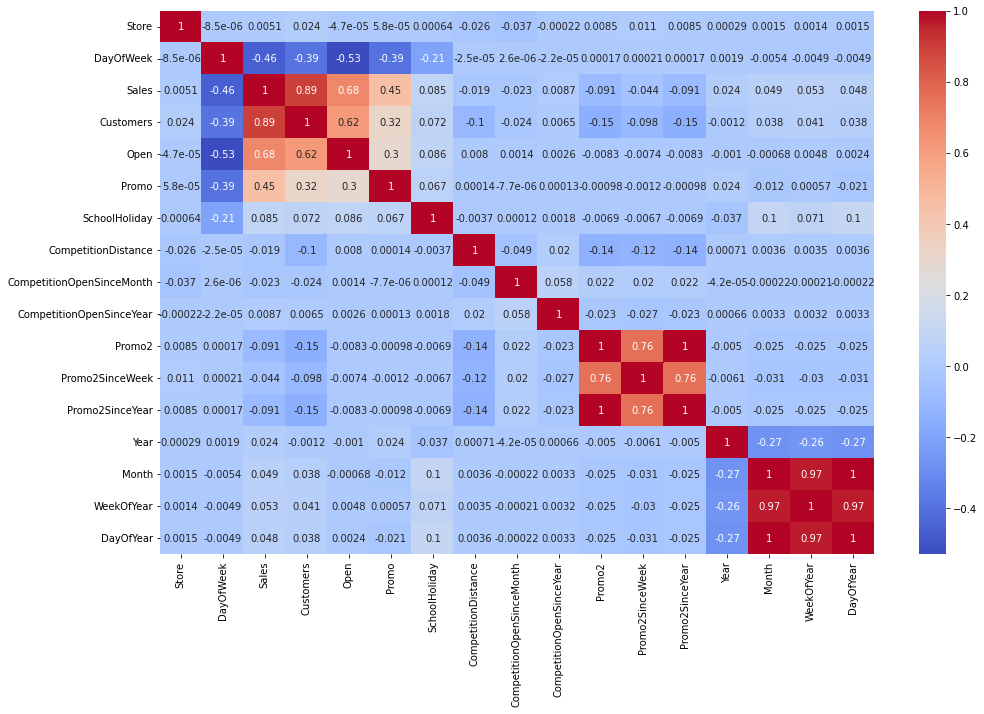

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

We'll drop Promo2SinceWeek, Promo2SinceYear,  PromoInterval because they correlated with Promo2

We can merge the column CompetitionOpenSiceYear and CompetitioOpenSinceMonth and make one column CompentitionOpen which will tell since how many months competition is open.


In [ ]:
#combining competition open since month and year into total months
df['CompetitionOpen'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
#correcting the neg values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
#df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'WeekOfYear', 'DayOfYear',
       'CompetitionOpen'],
      dtype='object')

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8831
1,Customers,5.1209
2,Open,11.5765
3,Promo,2.0330
4,SchoolHoliday,1.3073
5,CompetitionDistance,1.5812
6,CompetitionOpenSinceMonth,15.0530
7,CompetitionOpenSinceYear,42987504.7568
8,Promo2,1565440.8318
9,Promo2SinceWeek,3.9760


From the heatmap we can see that month, WeekOfYear and DayOfYear are highly correlated with each other and WeekOfYear has the highest affect on Sales. So we will drop Month and DayOfYear.

In [ ]:
df.drop(['Month','DayOfYear'],axis=1,inplace=True)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8827
1,Customers,5.1189
2,Open,11.5364
3,Promo,1.9912
4,SchoolHoliday,1.2801
5,CompetitionDistance,1.5811
6,CompetitionOpenSinceMonth,14.7995
7,CompetitionOpenSinceYear,41204162.4457
8,Promo2,1565420.4196
9,Promo2SinceWeek,3.9759


From heatmap we can see that CompetitionOpen, CompetitionOpenSinceYear and CompetitionOpenSinceMonth are highly correlated. So we will drop CompetitionOpenSinceYear and CompetitionOpenSinceMonth.

In [ ]:
df.drop(['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8825
1,Customers,5.1111
2,Open,11.5308
3,Promo,1.9908
4,SchoolHoliday,1.2789
5,CompetitionDistance,1.5760
6,Promo2,1565209.6746
7,Promo2SinceWeek,3.9755
8,Promo2SinceYear,1564169.3290
9,Year,27.5017


From the heatmap we can see that promo2, promo2SinceWeek and promo2SinceYear are having high correlation and promo2 has the highest affect on sales. So we will drop promo2SinceWeek and promo2SinceYear.

In [ ]:
df.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8825
1,Customers,5.1043
2,Open,11.5263
3,Promo,1.9907
4,SchoolHoliday,1.2789
5,CompetitionDistance,1.5699
6,Promo2,2.1382
7,Year,27.4981
8,WeekOfYear,3.7051
9,CompetitionOpen,1.4875


Dropping Year, Date, PromoInterval and Store as they don't affect our sales.

In [ ]:
df.drop(['Year','Store', 'PromoInterval'],axis=1,inplace=True)

In [ ]:
df.drop([ 'WeekOfYear'],axis=1,inplace=True)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,DayOfWeek,2.6163
1,Customers,5.0472
2,Open,7.6573
3,Promo,1.8758
4,SchoolHoliday,1.2189
5,CompetitionDistance,1.5184
6,Promo2,2.0119
7,CompetitionOpen,1.4578


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   DayOfWeek            1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   StoreType            1017209 non-null  object        
 9   Assortment           1017209 non-null  object        
 10  CompetitionDistance  1017209 non-null  float64       
 11  Promo2               1017209 non-null  int64         
 12  CompetitionOpen      1017209 non-null  float64       
dt

In [ ]:
#Checking null
df.isnull().sum()

DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
CompetitionOpen        0
dtype: int64

In [ ]:
df1= df.copy()

In [ ]:
#checking how many stores are actually open
df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

Removing the points from dataset when stores were closed which they do not account for any sales

In [ ]:
# Removing all the datapoints where Open is equal to 0
df1= df[df['Open']!=0]

In [ ]:
df.shape

(1017209, 13)

In [ ]:
df1.shape

(844392, 13)

In [ ]:
#changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
df1.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpen
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0000,0,82.0000
1,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0000,1,92.0000
2,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0000,1,103.0000
3,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0000,0,70.0000
4,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0000,0,3.0000


In [ ]:
df1.tail()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpen
1016776,2,2013-01-01,3375,566,1,0,1,1,b,a,150.0000,0,76.0000
1016827,2,2013-01-01,10765,2377,1,0,1,1,b,b,860.0000,0,159.0000
1016863,2,2013-01-01,5035,1248,1,0,1,1,b,b,840.0000,1,0.0000
1017042,2,2013-01-01,4491,1039,1,0,1,1,b,b,1430.0000,0,0.0000
1017190,2,2013-01-01,5961,1405,1,0,1,1,b,b,720.0000,0,130.0000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DayOfWeek            844392 non-null  int64         
 1   Date                 844392 non-null  datetime64[ns]
 2   Sales                844392 non-null  int64         
 3   Customers            844392 non-null  int64         
 4   Open                 844392 non-null  int64         
 5   Promo                844392 non-null  int64         
 6   StateHoliday         844392 non-null  int64         
 7   SchoolHoliday        844392 non-null  int64         
 8   StoreType            844392 non-null  object        
 9   Assortment           844392 non-null  object        
 10  CompetitionDistance  844392 non-null  float64       
 11  Promo2               844392 non-null  int64         
 12  CompetitionOpen      844392 non-null  float64       
dtypes: datetime64

In [ ]:
## Applying log transformation to remove skewness
df1['Sales'] = np.log(df1['Sales'])

In [ ]:
#Dropping the point which converges to infnity after transformation
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

In [ ]:
df1.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpen
0,5,2015-07-31,8.5685,555,1,1,0,1,c,a,1270.0000,0,82.0000
1,5,2015-07-31,8.7101,625,1,1,0,1,a,a,570.0000,1,92.0000
2,5,2015-07-31,9.0257,821,1,1,0,1,a,a,14130.0000,1,103.0000
3,5,2015-07-31,9.5465,1498,1,1,0,1,c,c,620.0000,0,70.0000
4,5,2015-07-31,8.4809,559,1,1,0,1,a,a,29910.0000,0,3.0000


One hot encoding for categorical columns

In [ ]:
# One hot encoding
dataset_pr = pd.get_dummies(df1, columns=["Assortment","StoreType", "DayOfWeek"])

In [ ]:
dataset_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Sales                844338 non-null  float64       
 2   Customers            844338 non-null  int64         
 3   Open                 844338 non-null  int64         
 4   Promo                844338 non-null  int64         
 5   StateHoliday         844338 non-null  int64         
 6   SchoolHoliday        844338 non-null  int64         
 7   CompetitionDistance  844338 non-null  float64       
 8   Promo2               844338 non-null  int64         
 9   CompetitionOpen      844338 non-null  float64       
 10  Assortment_a         844338 non-null  uint8         
 11  Assortment_b         844338 non-null  uint8         
 12  Assortment_c         844338 non-null  uint8         
 13  StoreType_a  

In [ ]:
dataset_pr.isnull().sum()

Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
CompetitionDistance    0
Promo2                 0
CompetitionOpen        0
Assortment_a           0
Assortment_b           0
Assortment_c           0
StoreType_a            0
StoreType_b            0
StoreType_c            0
StoreType_d            0
DayOfWeek_1            0
DayOfWeek_2            0
DayOfWeek_3            0
DayOfWeek_4            0
DayOfWeek_5            0
DayOfWeek_6            0
DayOfWeek_7            0
dtype: int64

In [ ]:
df_2= dataset_pr.copy()

##**Train test split and scaling**

###**Train Test Split**

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Sales                844338 non-null  float64       
 2   Customers            844338 non-null  int64         
 3   Open                 844338 non-null  int64         
 4   Promo                844338 non-null  int64         
 5   StateHoliday         844338 non-null  int64         
 6   SchoolHoliday        844338 non-null  int64         
 7   CompetitionDistance  844338 non-null  float64       
 8   Promo2               844338 non-null  int64         
 9   CompetitionOpen      844338 non-null  float64       
 10  Assortment_a         844338 non-null  uint8         
 11  Assortment_b         844338 non-null  uint8         
 12  Assortment_c         844338 non-null  uint8         
 13  StoreType_a  

In [ ]:
#setting date and store as index
df_2.set_index(['Date'],inplace=True)
#sorting index following the time series
df_2.sort_index(inplace=True)

In [ ]:
df_2.tail()

,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,CompetitionOpen,Assortment_a,...,StoreType_b,StoreType_c,StoreType_d,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,9.0316,746,1,1,0,1,17650.0000,1,20.0000,1,...,0,0,0,0,0,0,0,1,0,0
2015-07-31,9.1140,638,1,1,0,1,4330.0000,1,53.0000,0,...,0,0,1,0,0,0,0,1,0,0
2015-07-31,9.2787,826,1,1,0,1,45740.0000,0,83.0000,0,...,0,1,0,0,0,0,0,1,0,0
2015-07-31,9.3284,1137,1,1,0,1,11900.0000,0,22.0000,0,...,0,0,1,0,0,0,0,1,0,0
2015-07-31,8.5685,555,1,1,0,1,1270.0000,0,82.0000,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df_2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df_2.loc[start_test:end_test]

In [ ]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 22)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 22)
The shape of y_test is: (45852, 1)


In [ ]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [ ]:
list(X_train.columns)

['Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'CompetitionOpen',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7']

###**Scaling**

In [ ]:
# scaling
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

#**Model implementation**

##**Linear Regression**

In [ ]:
#applying fit on linear regression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking the regression coefficients
reg.coef_

array([[ 8.74014695e-01, -1.15269038e+11,  2.35813161e-01,
        -5.99039144e-03,  1.38473196e-02,  5.43712036e-02,
         3.83648848e-02,  1.13628721e-02,  2.48500266e+12,
         4.89071467e+11,  2.48193238e+12, -1.09732306e+12,
        -2.96643380e+11, -7.49906072e+11, -1.01502051e+12,
         6.57897991e+11,  6.70690407e+11,  6.66685352e+11,
         6.51853365e+11,  6.60090394e+11,  6.73050221e+11,
         1.16120581e+11]])

In [ ]:
#making predictions
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [ ]:
#calculate metrics and print the results for test set
#Mean Absolute Error or MAE
MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
#Mean Squared Error or MSE
MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
#Root Mean Squared Error or RMSE
RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
#R2
R2_train = round(r2_score(y_train, y_pred_train),6)
R2_test = round(r2_score(y_test, y_pred_test),6)
#Adjusted R2
Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
#printing test results
print(f'The Mean Absolute Error for the validation set is {MAE_test}')
print(f'The Mean Squared Error for the validation set is {MSE_test}')
print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
print(f'The R^2 for the validation set is {R2_test}')
print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

The Mean Absolute Error for the validation set is 0.379612
The Mean Squared Error for the validation set is 0.246445
The Root Mean Squared Error for the validation set is 0.496433
The R^2 for the validation set is 0.738373
The Adjusted R^2 for the validation set is 0.738247


In [ ]:
#Finding score of linear regression
train_score_reg=reg.score(X_train,y_train)
train_score_reg
test_score_reg=reg.score(X_test,y_test)
test_score_reg

0.7383728128215306

In [ ]:
score_reg = {'MAE_train':[MAE_train], 'MSE_train':[MSE_train], 'RMSE_train':[RMSE_train], 'R2_train':[R2_train], 
             'Adj_r2_train':[Adj_r2_train],'train_score':[train_score_reg],'MAE_test':[MAE_test], 'MSE_test':[MSE_test], 
             'RMSE_test':[RMSE_test], 'R2_test':[R2_test], 'Adj_r2_test':[Adj_r2_test],'test_score':[test_score_reg]}

In [ ]:
#Making dataframe of performance parameters
df_reg =pd.DataFrame(score_reg, index=['Linear Regression'])

In [ ]:
df_reg

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
Linear Regression,0.3777,0.2536,0.5036,0.7464,0.7464,0.7464,0.3796,0.2464,0.4964,0.7384,0.7382,0.7384


(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

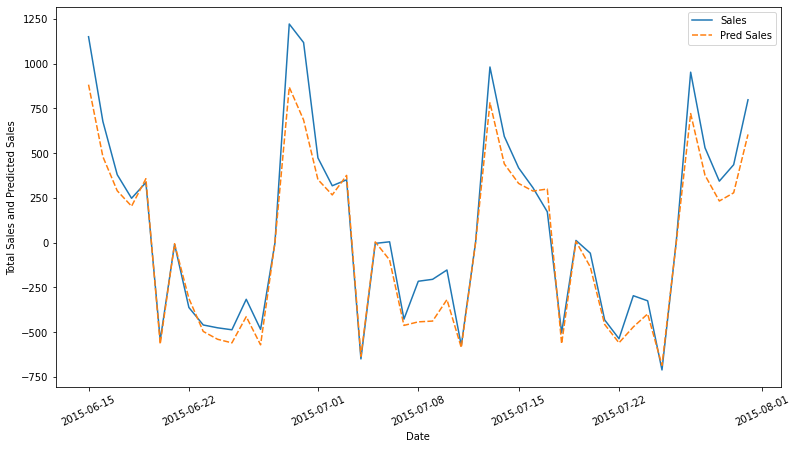

In [ ]:
#Plotting actual sales vs predicted sales
a_reg= y_test.copy()
a_reg['Pred Sales'] = y_pred_test
plt.figure(figsize=(13,7))
plot = a_reg.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)

Observations:

*   The Linear regression model score is 73.83% on test dataset.
*   As our dataset has most of the categorical columns with some continuous features such as customers and competition distance due to which linear regression is not quite good in terms of predicting the output.
*    Overall if we see the graph of predicted sales vs actual sales most of the points predicted are somewhat close to actual values of sales but there are few points where it is not able to predict well. This problem may be resolved by applying Decision Tree model.




##**Decision Tree**

In [ ]:
# Create an instance of the Decision Tree Regressor
DTRegressor_model = DecisionTreeRegressor(max_depth=25)
DTRegressor_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=25)

In [ ]:
# Predictions Train and Test
y_train_pred_DT = DTRegressor_model.predict(X_train)
y_test_pred_DT = DTRegressor_model.predict(X_test)

In [ ]:
#calculate metrics and print the results for test set
#Mean Absolute Error or MAE
MAE_train_DT = round(mean_absolute_error(y_train,y_train_pred_DT),6)
MAE_test_DT = round(mean_absolute_error(y_test,y_test_pred_DT),6)
#Mean Squared Error or MSE
MSE_train_DT = round(mean_squared_error(y_train,y_train_pred_DT),6)
MSE_test_DT = round(mean_squared_error(y_test,y_test_pred_DT),6)
#Root Mean Squared Error or RMSE
RMSE_train_DT = round(mean_squared_error(y_train,y_train_pred_DT,squared=False),6)
RMSE_test_DT = round(mean_squared_error(y_test,y_test_pred_DT,squared=False),6)
#R2
R2_train_DT = round(r2_score(y_train, y_train_pred_DT),6)
R2_test_DT = round(r2_score(y_test, y_test_pred_DT),6)
#Adjusted R2
Adj_r2_train_DT = round(1 - (1-r2_score(y_train, y_train_pred_DT)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
Adj_r2_test_DT = round(1 - (1-r2_score(y_test, y_test_pred_DT)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
#printing train results
print("Train results are:")
print(f'The Mean Absolute Error for the train set is {MAE_train_DT}')
print(f'The Mean Squared Error for the train set is {MSE_train_DT}')
print(f'The Root Mean Squared Error for the train set is {RMSE_train_DT}')
print(f'The R^2 for the train set is {R2_train_DT}')
print(f'The Adjusted R^2 for the train set is {Adj_r2_train_DT}')
print()
#printing test results
print("Test results are:")
print(f'The Mean Absolute Error for the validation set is {MAE_test_DT}')
print(f'The Mean Squared Error for the validation set is {MSE_test_DT}')
print(f'The Root Mean Squared Error for the validation set is {RMSE_test_DT}')
print(f'The R^2 for the validation set is {R2_test_DT}')
print(f'The Adjusted R^2 for the validation set is {Adj_r2_test_DT}')


Train results are:
The Mean Absolute Error for the train set is 0.02458
The Mean Squared Error for the train set is 0.003385
The Root Mean Squared Error for the train set is 0.05818
The R^2 for the train set is 0.996615
The Adjusted R^2 for the train set is 0.996615

Test results are:
The Mean Absolute Error for the validation set is 0.187959
The Mean Squared Error for the validation set is 0.066512
The Root Mean Squared Error for the validation set is 0.257898
The R^2 for the validation set is 0.929391
The Adjusted R^2 for the validation set is 0.929357


In [ ]:
#Getting the score of model
train_score_DT=DTRegressor_model.score(X_train,y_train)
test_score_DT= DTRegressor_model.score(X_test,y_test)

(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

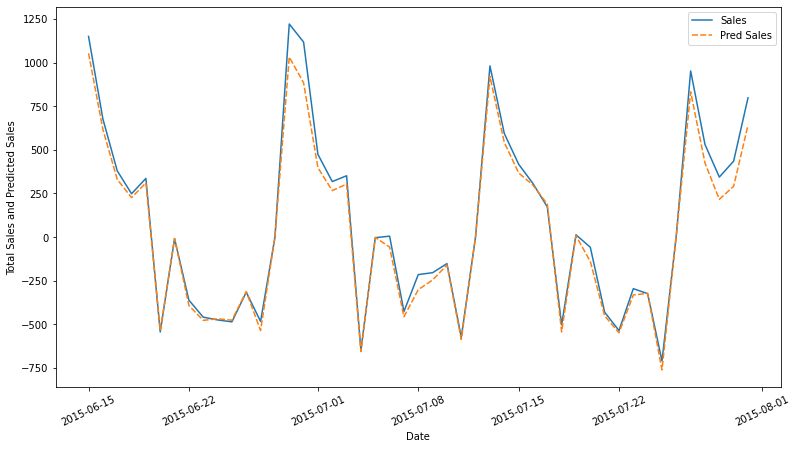

In [ ]:
#Plotting Actual sales vs predicted sales
a_DT= y_test.copy()
a_DT['Pred Sales'] = y_test_pred_DT.tolist()
plt.figure(figsize=(13,7))
plot = a_DT.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)


In [ ]:
score_DT = {'MAE_train':MAE_train_DT, 'MSE_train':MSE_train_DT, 'RMSE_train':RMSE_train_DT, 'R2_train':R2_train_DT, 
             'Adj_r2_train':Adj_r2_train_DT,'train_score':train_score_DT,'MAE_test':MAE_test_DT, 'MSE_test':MSE_test_DT, 
             'RMSE_test':RMSE_test_DT, 'R2_test':R2_test_DT, 'Adj_r2_test':Adj_r2_test_DT,'test_score':test_score_DT}

In [ ]:
#Making dataframe of performance parameters
df_dt = pd.DataFrame(score_DT, index= ['DecisionTreeRegressor'])

In [ ]:
df_dt

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
DecisionTreeRegressor,0.0246,0.0034,0.0582,0.9966,0.9966,0.9966,0.1880,0.0665,0.2579,0.9294,0.9294,0.9294


In [ ]:
model_df = pd.concat([df_reg, df_dt], ignore_index = False, axis = 0)

In [ ]:
model_df

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
Linear Regression,0.3777,0.2536,0.5036,0.7464,0.7464,0.7464,0.3796,0.2464,0.4964,0.7384,0.7382,0.7384
DecisionTreeRegressor,0.0246,0.0034,0.0582,0.9966,0.9966,0.9966,0.1880,0.0665,0.2579,0.9294,0.9294,0.9294


Observation: 
*   Decision tree is 92.97 percent effecient in predicting the sales.
*   When we have mostly categorical columns in our dataset then decision tree is good choice and from our predicted vs actual sales graph also we can say that Decision tree has predicted most of the points very close to actual sales.
*   Although the test score is 92.97% but if we see the train score is 99.6% so we'll try to reduce increase the test score by applying the Random forest regressor.
*   The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points.

##**Random Forest**

In [ ]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions Train and Test
y_train_pred_RF = random_forest.predict(X_train)
y_test_pred_RF = random_forest.predict(X_test)

In [ ]:
#calculate metrics and print the results for test set
#Mean Absolute Error or MAE
MAE_train_RF = round(mean_absolute_error(y_train,y_train_pred_RF),6)
MAE_test_RF = round(mean_absolute_error(y_test,y_test_pred_RF),6)
#Mean Squared Error or MSE
MSE_train_RF = round(mean_squared_error(y_train,y_train_pred_RF),6)
MSE_test_RF = round(mean_squared_error(y_test,y_test_pred_RF),6)
#Root Mean Squared Error or RMSE
RMSE_train_RF = round(mean_squared_error(y_train,y_train_pred_RF,squared=False),6)
RMSE_test_RF = round(mean_squared_error(y_test,y_test_pred_RF,squared=False),6)
#R2
R2_train_RF = round(r2_score(y_train, y_train_pred_RF),6)
R2_test_RF = round(r2_score(y_test, y_test_pred_RF),6)
#Adjusted R2
Adj_r2_train_RF = round(1 - (1-r2_score(y_train, y_train_pred_RF)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
Adj_r2_test_RF = round(1 - (1-r2_score(y_test, y_test_pred_RF)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
#printing train results
print("Train results are:")
print(f'The Mean Absolute Error for the train set is {MAE_train_RF}')
print(f'The Mean Squared Error for the train set is {MSE_train_RF}')
print(f'The Root Mean Squared Error for the train set is {RMSE_train_RF}')
print(f'The R^2 for the train set is {R2_train_RF}')
print(f'The Adjusted R^2 for the train set is {Adj_r2_train_RF}')
print()
#printing test results
print("Test results are:")
print(f'The Mean Absolute Error for the validation set is {MAE_test_RF}')
print(f'The Mean Squared Error for the validation set is {MSE_test_RF}')
print(f'The Root Mean Squared Error for the validation set is {RMSE_test_RF}')
print(f'The R^2 for the validation set is {R2_test_RF}')
print(f'The Adjusted R^2 for the validation set is {Adj_r2_test_RF}')


Train results are:
The Mean Absolute Error for the train set is 0.04554
The Mean Squared Error for the train set is 0.00392
The Root Mean Squared Error for the train set is 0.062607
The R^2 for the train set is 0.99608
The Adjusted R^2 for the train set is 0.99608

Test results are:
The Mean Absolute Error for the validation set is 0.14237
The Mean Squared Error for the validation set is 0.035497
The Root Mean Squared Error for the validation set is 0.188406
The R^2 for the validation set is 0.962317
The Adjusted R^2 for the validation set is 0.962299


In [ ]:
#getting the scores of model
train_score_RF=random_forest.score(X_train,y_train)
test_score_RF= random_forest.score(X_test,y_test)

In [ ]:
score_RF = {'MAE_train':MAE_train_RF, 'MSE_train':MSE_train_RF, 'RMSE_train':RMSE_train_RF, 'R2_train':R2_train_RF, 
             'Adj_r2_train':Adj_r2_train_RF,'train_score':train_score_RF,'MAE_test':MAE_test_RF, 'MSE_test':MSE_test_RF, 
             'RMSE_test':RMSE_test_RF, 'R2_test':R2_test_RF, 'Adj_r2_test':Adj_r2_test_RF,'test_score':test_score_RF}

In [ ]:
#making dataframe of performance parameters
df_rf = pd.DataFrame(score_RF, index= ['Random Forest Regressor'])

(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

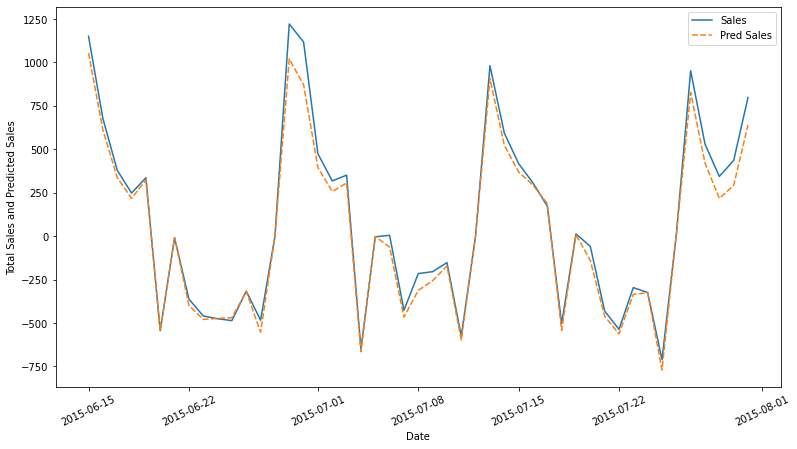

In [ ]:
#Plotting actual sales vs Predictes sales
a_RF= y_test.copy()
a_RF['Pred Sales'] = y_test_pred_RF.tolist()
plt.figure(figsize=(13,7))
plot = a_RF.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)


In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
model_df = pd.concat([df_reg, df_dt, df_rf], ignore_index = False, axis = 0)

In [ ]:
model_df

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
Linear Regression,0.3777,0.2536,0.5036,0.7464,0.7464,0.7464,0.3796,0.2464,0.4964,0.7384,0.7382,0.7384
DecisionTreeRegressor,0.0246,0.0034,0.0582,0.9966,0.9966,0.9966,0.1880,0.0665,0.2579,0.9294,0.9294,0.9294
Random Forest Regressor,0.0455,0.0039,0.0626,0.9961,0.9961,0.9961,0.1424,0.0355,0.1884,0.9623,0.9623,0.9623


Observation:

*   Random forest regressor is 96.23% effecient in predicting the output.
*   As from the graph of predicted vs actual sales also we can see most of the datapoints the predicted value is follwing the actual sales very closely.


##**Tuning the Random Forest**

In [ ]:
# Create model
rf_tuned = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [140, 120, 130]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

In [ ]:
#best para
rf_random.best_params_

best prameter for random forest tuned is min_samples_split=5, n_estimators=120

In [ ]:
# min_samples_split=5, n_estimators=120
# {'n_estimators': 120,
#  'min_samples_split': 5,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': None,
#  'bootstrap': True}

In [ ]:
#save the best parameters
random_t = rf_random.best_estimator_

In [ ]:
#making predictions
y_pred_train_rf_tuned = random_t.predict(X_train)
y_pred_test_rf_tuned = random_t.predict(X_test)


In [ ]:
#calculate metrics and print the results for test set
#Mean Absolute Error or MAE
MAE_train_RF_tuned = round(mean_absolute_error(y_train,y_pred_train_rf_tuned),6)
MAE_test_RF_tuned = round(mean_absolute_error(y_test,y_pred_test_rf_tuned),6)
#Mean Squared Error or MSE
MSE_train_RF_tuned = round(mean_squared_error(y_train,y_pred_train_rf_tuned),6)
MSE_test_RF_tuned = round(mean_squared_error(y_test,y_pred_test_rf_tuned),6)
#Root Mean Squared Error or RMSE
RMSE_train_RF_tuned = round(mean_squared_error(y_train,y_pred_train_rf_tuned,squared=False),6)
RMSE_test_RF_tuned = round(mean_squared_error(y_test,y_pred_test_rf_tuned,squared=False),6)
#R2
R2_train_RF_tuned = round(r2_score(y_train, y_pred_train_rf_tuned),6)
R2_test_RF_tuned = round(r2_score(y_test, y_pred_test_rf_tuned),6)
#Adjusted R2
Adj_r2_train_RF_tuned = round(1 - (1-r2_score(y_train, y_pred_train_rf_tuned)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
Adj_r2_test_RF_tuned = round(1 - (1-r2_score(y_test, y_pred_test_rf_tuned)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
#printing train results
print("Train results are:")
print(f'The Mean Absolute Error for the train set is {MAE_train_RF_tuned}')
print(f'The Mean Squared Error for the train set is {MSE_train_RF_tuned}')
print(f'The Root Mean Squared Error for the train set is {RMSE_train_RF_tuned}')
print(f'The R^2 for the train set is {R2_train_RF_tuned}')
print(f'The Adjusted R^2 for the train set is {Adj_r2_train_RF_tuned}')
print()
#printing test results
print("Test results are:")
print(f'The Mean Absolute Error for the validation set is {MAE_test_RF_tuned}')
print(f'The Mean Squared Error for the validation set is {MSE_test_RF_tuned}')
print(f'The Root Mean Squared Error for the validation set is {RMSE_test_RF_tuned}')
print(f'The R^2 for the validation set is {R2_test_RF_tuned}')
print(f'The Adjusted R^2 for the validation set is {Adj_r2_test_RF_tuned}')


Train results are:
The Mean Absolute Error for the train set is 0.060998
The Mean Squared Error for the train set is 0.006913
The Root Mean Squared Error for the train set is 0.083146
The R^2 for the train set is 0.993087
The Adjusted R^2 for the train set is 0.993087

Test results are:
The Mean Absolute Error for the validation set is 0.141705
The Mean Squared Error for the validation set is 0.035232
The Root Mean Squared Error for the validation set is 0.187703
The R^2 for the validation set is 0.962597
The Adjusted R^2 for the validation set is 0.962579


In [ ]:
train_score_RF_tuned=random_t.score(X_train,y_train)
test_score_RF_tuned= random_t.score(X_test,y_test)

In [ ]:
score_RF_tuned = {'MAE_train':MAE_train_RF_tuned, 'MSE_train':MSE_train_RF_tuned, 'RMSE_train':RMSE_train_RF_tuned, 'R2_train':R2_train_RF_tuned, 
             'Adj_r2_train':Adj_r2_train_RF_tuned,'train_score':train_score_RF_tuned,'MAE_test':MAE_test_RF_tuned, 'MSE_test':MSE_test_RF_tuned, 
             'RMSE_test':RMSE_test_RF_tuned, 'R2_test':R2_test_RF_tuned, 'Adj_r2_test':Adj_r2_test_RF_tuned,'test_score':test_score_RF_tuned}

In [ ]:
#creating dataframe to show all performance parameters in tabular form
df_rf_tuned = pd.DataFrame(score_RF_tuned, index= ['Random Forest Regressor tuned'])

In [ ]:
df_rf_tuned

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
Random Forest Regressor tuned,0.0610,0.0069,0.0831,0.9931,0.9931,0.9931,0.1417,0.0352,0.1877,0.9626,0.9626,0.9626


(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

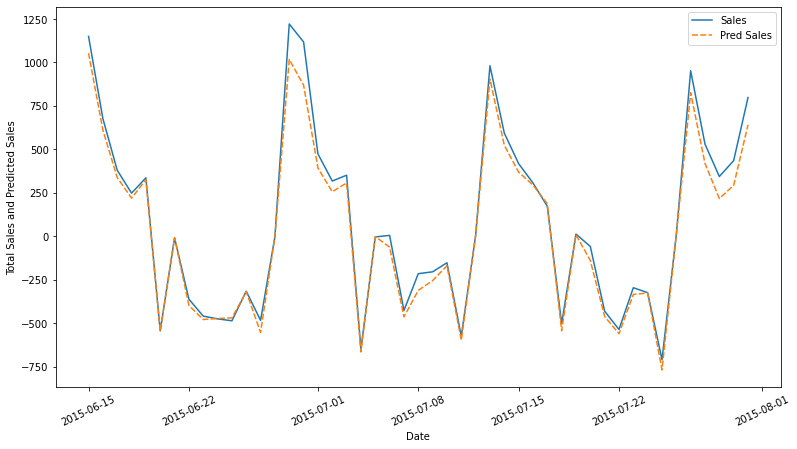

In [ ]:
#Plotting the graph of actual vs predicted sales
a_rf_tuned= y_test.copy()
a_rf_tuned['Pred Sales'] = y_pred_test_rf_tuned.tolist()
plt.figure(figsize=(13,7))
plot = a_rf_tuned.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)

In [ ]:
#Combining all the performance parameter for all models
model_df = pd.concat([df_reg, df_dt, df_rf, df_rf_tuned], ignore_index = False, axis = 0)
model_df

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
Linear Regression,0.3777,0.2536,0.5036,0.7464,0.7464,0.7464,0.3796,0.2464,0.4964,0.7384,0.7382,0.7384
DecisionTreeRegressor,0.0246,0.0034,0.0582,0.9966,0.9966,0.9966,0.1880,0.0665,0.2579,0.9294,0.9294,0.9294
Random Forest Regressor,0.0455,0.0039,0.0626,0.9961,0.9961,0.9961,0.1424,0.0355,0.1884,0.9623,0.9623,0.9623
Random Forest Regressor tuned,0.0610,0.0069,0.0831,0.9931,0.9931,0.9931,0.1417,0.0352,0.1877,0.9626,0.9626,0.9626


#**Feature Importance**

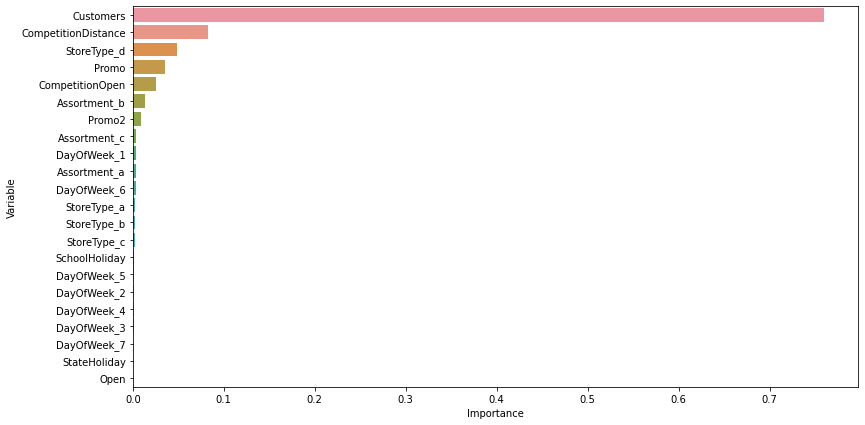

In [ ]:
#visualising feature importance of XGB
plt.figure(figsize=(13,7))
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_forest.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

#**Model Performance and Evaluation**

In [ ]:
#representing all model performance parameters in tabular form
model_df

,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,train_score,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test,test_score
Linear Regression,0.3777,0.2536,0.5036,0.7464,0.7464,0.7464,0.3796,0.2464,0.4964,0.7384,0.7382,0.7384
DecisionTreeRegressor,0.0246,0.0034,0.0582,0.9966,0.9966,0.9966,0.1880,0.0665,0.2579,0.9294,0.9294,0.9294
Random Forest Regressor,0.0455,0.0039,0.0626,0.9961,0.9961,0.9961,0.1424,0.0355,0.1884,0.9623,0.9623,0.9623
Random Forest Regressor tuned,0.0610,0.0069,0.0831,0.9931,0.9931,0.9931,0.1417,0.0352,0.1877,0.9626,0.9626,0.9626


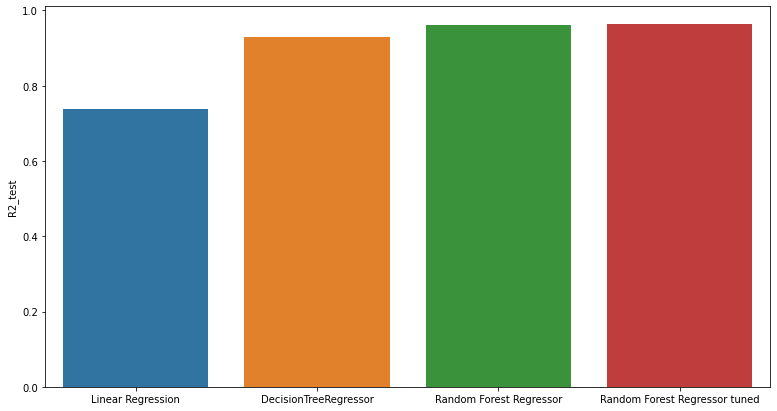

In [ ]:
#visualising our comparison df for Test R2
plt.figure(figsize=(13,7))
sns.barplot(x= model_df.index ,y = model_df['R2_test'])

In [ ]:
#test values
baseline_r2 = 0.929706
random_r2 = 0.962317
r_tuned_r2 = 0.962541

Improvement in Random forest in comparison to baseline model(Decision tree)

In [ ]:
#improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 3.508 % was seen in Random Forest against Decision Tree.


Improvement in Random forest Tuned in comparison to baseline model(Decision tree)

In [ ]:
#improvement % of tuned vs baseline
improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 3.532 % was seen in Random Forest Tuned against Decision Tree.


Improvement in Random forest Tuned in comparison to Random forest

In [ ]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.023 % was seen in Random Forest Tuned against Simple Random Forest.


In [ ]:
#predictions 
y_pred_test_1 = random_forest.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test_1.tolist()

In [ ]:
#head
six_weeks_sales_df.head(10)

,Sales,Pred_Sales
Date,,
2015-06-15,0.8480,0.8472
2015-06-15,1.4327,1.1133
2015-06-15,1.1842,1.0017
2015-06-15,2.1212,1.8058
2015-06-15,-0.3316,-0.3606
2015-06-15,1.3354,1.2473
2015-06-15,1.1361,1.0321
2015-06-15,1.8191,1.6115
2015-06-15,1.3644,1.0906


In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [ ]:
#sales vs predictions
six_weeks_sales_df.head()

,Sales,Pred_Sales
Date,,
2015-06-15,9.1169,9.1165
2015-06-15,9.3659,9.2299
2015-06-15,9.2601,9.1823
2015-06-15,9.6591,9.5248
2015-06-15,8.6145,8.6022


In [ ]:
six_weeks_sales_df_1 =  np.exp(six_weeks_sales_df)

In [ ]:
#Predicted sales and actual sales 
six_weeks_sales_df_1.head(10)

,Sales,Pred_Sales
Date,,
2015-06-15,9108.0000,9104.5927
2015-06-15,11683.0000,10197.4042
2015-06-15,10510.0000,9723.8736
2015-06-15,15664.0000,13695.2383
2015-06-15,5511.0000,5443.4968
2015-06-15,11209.0000,10796.2105
2015-06-15,10297.0000,9850.7082
2015-06-15,13773.0000,12607.3144
2015-06-15,11348.0000,10099.2039


**As we can see from above rows the prediction are very close to actual values.**

#**Conclusion and Recommendations**


##**Conclusion:**



Some important conclusions drawn from the analysis are as follows:

*  There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week.
*  The positive effect of promotion on Customers and Sales is observable.
*  Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
*  Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
*  The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
*  Decision tree was chosen as baseline model considering our features were mostly categorical with few having continuous importance.
*  Random Forest shows improvement of 3.508% as compared to Decision tree.
*  Random Forest Tuned Model gave the best results and only 0.023% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.




##**Recommendations:**



*  More stores should be encouraged for promotion.
*  Store type B should be increased in number.
*  There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.